In [10]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72334/2192500684.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


   numberOfInstallationConditions  final_result
0                               0      0.082228
1                               1      0.082791
2                               2      0.083957
3                               3      0.086197
4                               5      0.091741
5                               8      0.105062
6                              13      0.127670


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72334/2192500684.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


   numberOfInstallationConditions  final_result
0                               0      0.082442
1                               1      0.085481
2                               2      0.095451
3                               3      0.109935
4                               5      0.146815
5                               8      0.211486
6                              13      0.300184


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72334/2192500684.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


   numberOfInstallationConditions  final_result
0                               0      0.082130
1                               1      0.100107
2                               2      0.140081
3                               3      0.189257
4                               5      0.293853
5                               8      0.455562
6                              13      0.676362


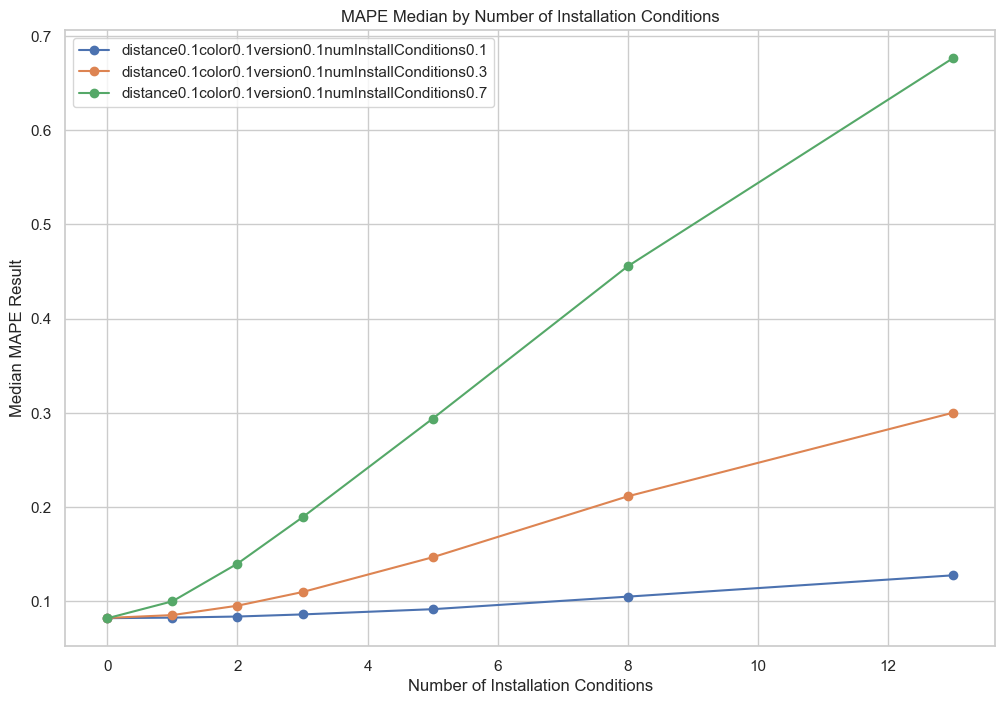

In [12]:
findspark.init()
analysis = [
    "distance0.1color0.1version0.1numInstallConditions0.1",
    "distance0.1color0.1version0.1numInstallConditions0.3",
    "distance0.1color0.1version0.1numInstallConditions0.7",
]

seaborn.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

for dataset in analysis:
    df = pd.read_parquet(f'../../../generate data/5.3/ics/{dataset}/')
    df = df[~df["partCodeId"].str.contains("model")]
    # df = df[df["forecastDistance"] < 35]
    # df["forecastDistance"] = df["forecastDistance"] - 5


    df["formula_result"] = (df["dfQuantity"] - df["actualQuantity"]).abs() / df["actualQuantity"]
    # Group by the correct columns
    df_result = df.groupby([
        "partCodeId",
        "vehicleModelId",
        "numberOfInstallationConditions",
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_result = df_result[df_result["number"] > 0 ]

    #sort by numeric value of numberOfInstallationConditions
    df_result["numberOfInstallationConditions"] = df_result["numberOfInstallationConditions"].astype(int)
    df_result = df_result.sort_values(by="numberOfInstallationConditions", ascending=True)
    

    # Remove values that are below 0
    df_result = df_result[df_result["final_result"] >= 0]


    # Group by forecastdistance and calculate the median for each group
    df_forecast_distance_median = df_result.groupby("numberOfInstallationConditions")["final_result"].quantile(0.5).reset_index()
    print(df_forecast_distance_median)


    # Plot the results
    plt.plot(df_forecast_distance_median["numberOfInstallationConditions"], df_forecast_distance_median["final_result"], marker='o')

plt.title("MAPE Median by Number of Installation Conditions")
plt.xlabel(f"Number of Installation Conditions")
plt.ylabel("Median MAPE Result")
plt.grid(True)    
plt.legend(analysis)    
plt.show()